# <center>Data Science : Lab 1</center>
---

## 1. Select a data source

Data source > https://covid19.ddc.moph.go.th/

API Covid-19 : https://covid19.ddc.moph.go.th/api/Cases/round-3-line-lists

ข้อมูลผู้ป่วยระลอก 3 ตั้งแต่ 01/04/2021

## 2. Identify what form of data it has 
: Transactional data

## 3. Select one aspect/question of the data
: กลุ่มผู้ป่วยโควิดระลอก 3 ตั้งแต่วันที่ 01/04/2021 ส่วนใหญ่เป็นกลุ่มคนไหน อยู่ในช่วงอายุเท่าไหร่ และมีปัจจัยเสี่ยงมาจากที่ใด

## 4. Create a visualization to describe the data

### Import Library

In [19]:
import certifi
import json
from urllib3 import request, PoolManager
from pandas.io.json import json_normalize

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['font.family']='TH SarabunPSK'
plt.rcParams['font.size']=18
sns.set_style("darkgrid")
sns.set(font="TH SarabunPSK")
# sns.reset_orig()

### Get data

In [45]:
#ดึงข้อมูลจาก API COVID
http = PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())
url = 'https://covid19.ddc.moph.go.th/api/Cases/round-3-line-lists'
r = http.request('GET', url)
data = json.loads(r.data.decode('utf-8'))

In [46]:
#จัดข้อมูลให้อยู่ในรูปแบบของ Data Frame เพื่อที่จะนำไปใช้งานต่อ
list_data = []
for i in data['data']:
    list_data.append(i)

df = pd.DataFrame.from_records(list_data)

In [47]:
#ดูข้อมูล 5 แถวแรก
df.head()

,txn_date,gender,age_number,age_range,nationality,job,risk,patient_type,province,update_date
0,2021-04-01,ชาย,24,20-29 ปี,Thailand,None,สถานบันเทิง,1.ผู้ป่วย PUI,กรุงเทพมหานคร,None
1,2021-04-01,ชาย,23,20-29 ปี,Thailand,None,สถานบันเทิง,2.สัมผัสผู้ติดเชื้อ,กรุงเทพมหานคร,None
2,2021-04-01,ชาย,29,20-29 ปี,Burma,รับจ้างทั่วไป / ฟรีแลนซ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,2.สัมผัสผู้ติดเชื้อ,กรุงเทพมหานคร,None
3,2021-04-01,ชาย,27,20-29 ปี,Burma,พนักงานบริษัท/โรงงาน,Cluster สมุทรสาคร,8.ขอตรวจหาเชื้อเอง,สมุทรสาคร,None
4,2021-04-01,ชาย,28,20-29 ปี,Burma,ว่างงาน,Cluster สมุทรสาคร,8.ขอตรวจหาเชื้อเอง,สมุทรสาคร,None


In [48]:
#ดูข้อมูล 5 แถวสุดท้าย
df.tail()

,txn_date,gender,age_number,age_range,nationality,job,risk,patient_type,province,update_date
4995,2021-04-13,ชาย,26,20-29 ปี,Thailand,None,ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต,8.ขอตรวจหาเชื้อเอง,นครราชสีมา,None
4996,2021-04-13,ชาย,21,20-29 ปี,Thailand,None,สถานบันเทิง,-,อุบลราชธานี,None
4997,2021-04-13,ชาย,24,20-29 ปี,Thailand,None,สถานบันเทิง,-,อุบลราชธานี,None
4998,2021-04-13,ชาย,27,20-29 ปี,Thailand,None,สถานบันเทิง,-,อุบลราชธานี,None
4999,2021-04-13,ชาย,22,20-29 ปี,Thailand,None,อยู่ระหว่างการสอบสวน,-,ชลบุรี,None


In [49]:
#ดูภาพรวมของข้อมูลทั้งหมด
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   txn_date      5000 non-null   object
 1   gender        5000 non-null   object
 2   age_number    4663 non-null   object
 3   age_range     5000 non-null   object
 4   nationality   4496 non-null   object
 5   job           1843 non-null   object
 6   risk          4994 non-null   object
 7   patient_type  5000 non-null   object
 8   province      5000 non-null   object
 9   update_date   0 non-null      object
dtypes: object(10)
memory usage: 390.8+ KB


In [54]:
#ดู Distribution คร่าว ๆ ของแต่ละคอลัมน์ว่าเป็นอย่างไร | 
df.describe().T

,count,unique,top,freq
txn_date,5000,13,2021-04-12,985
gender,5000,3,ชาย,2476
age_number,4663,88,25,287
age_range,5000,9,20-29 ปี,2322
nationality,4496,41,Thailand,4239
job,1843,31,พนักงานบริษัท/โรงงาน,297
risk,4994,19,สถานบันเทิง,2420
patient_type,5000,8,7.สำรวจกลุ่มเสี่ยง (survey),1919
province,5000,74,กรุงเทพมหานคร,1533
update_date,0,0,NaN,NaN


In [55]:
#ดูคอลัมของข้อมูล
df.columns

Index(['txn_date', 'gender', 'age_number', 'age_range', 'nationality', 'job',
       'risk', 'patient_type', 'province', 'update_date'],
      dtype='object')

In [56]:
#เช็ค Missing value 
df.isna().sum()

txn_date           0
gender             0
age_number       337
age_range          0
nationality      504
job             3157
risk               6
patient_type       0
province           0
update_date     5000
dtype: int64

In [57]:
#เช็ค Missing value
df.isnull().any()

txn_date        False
gender          False
age_number       True
age_range       False
nationality      True
job              True
risk             True
patient_type    False
province        False
update_date      True
dtype: bool

In [58]:
#เนื่องข้อมูล Column "txn_date" มี type เป็นแบบ Object จึงต้องทำการแปลงข้อมูล DATE จาก Object เป็น Datetime
df['txn_date'] = pd.to_datetime(df['txn_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   txn_date      5000 non-null   datetime64[ns]
 1   gender        5000 non-null   object        
 2   age_number    4663 non-null   object        
 3   age_range     5000 non-null   object        
 4   nationality   4496 non-null   object        
 5   job           1843 non-null   object        
 6   risk          4994 non-null   object        
 7   patient_type  5000 non-null   object        
 8   province      5000 non-null   object        
 9   update_date   0 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 390.8+ KB


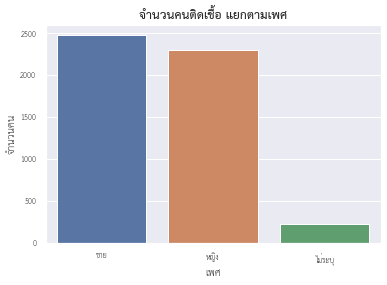

In [59]:
sns.countplot(data = df, x= 'gender')
plt.xlabel("เพศ",fontsize = 15)
plt.ylabel("จำนวนคน",fontsize = 15)
plt.title("จำนวนคนติดเชื้อ แยกตามเพศ",fontdict= {'fontsize': 18, 'fontweight':'bold'}) 
plt.show()

จากกราฟจะพบว่า ผู้ป่วยโควิดส่วนใหญ่จะเป็นผู้ป่วยเพศชาย

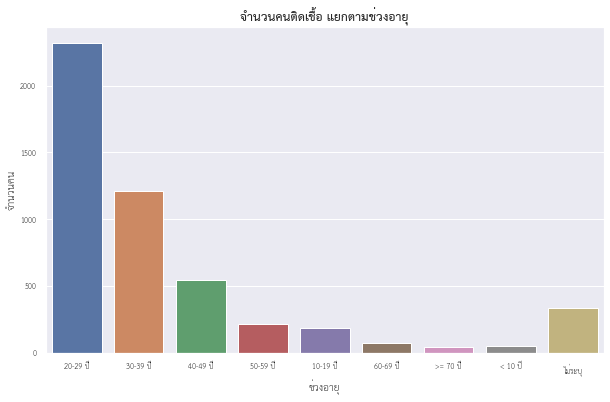

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x= 'age_range')
plt.xlabel("ช่วงอายุ",fontsize = 15)
plt.ylabel("จำนวนคน",fontsize = 15)
plt.title("จำนวนคนติดเชื้อ แยกตามช่วงอายุ",fontdict= {'fontsize': 18, 'fontweight':'bold'}) 
plt.show()

จากกราฟจะพบว่า ผู้ป่วยโควิดส่วนใหญ่จะอยู่ในช่วงอายุ 20-29 ปี

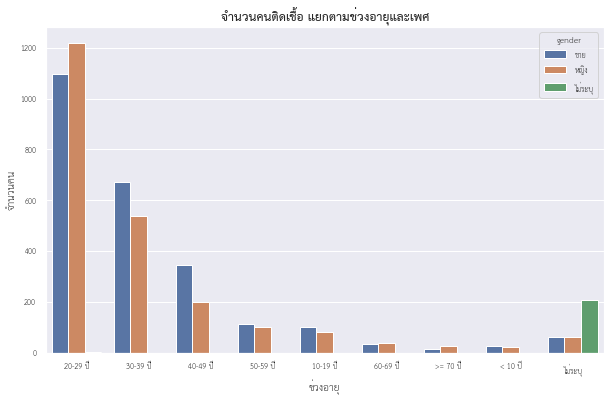

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'age_range', hue = 'gender')
plt.xlabel("ช่วงอายุ",fontsize = 15)
plt.ylabel("จำนวนคน",fontsize = 15)
plt.title("จำนวนคนติดเชื้อ แยกตามช่วงอายุและเพศ",fontdict= {'fontsize': 18, 'fontweight':'bold'}) 
plt.show()

จากกราฟจะพบว่า ผู้ป่วยโควิดส่วนใหญ่ที่อยู่ในช่วงอายุ 20-29 ปี จะเป็นผู้ป่วยเพศหญิง

In [34]:
df_risk = df['risk'].value_counts().to_frame()
df_risk

,risk
สถานบันเทิง,2420
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,1380
อยู่ระหว่างการสอบสวน,427
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,214
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,186
Cluster สมุทรสาคร,134
ผู้ที่เดินทางมาจากต่างประเทศ และเข้า ASQ/ALQ,66
State Quarantine,36
ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต,28
อื่นๆ,26


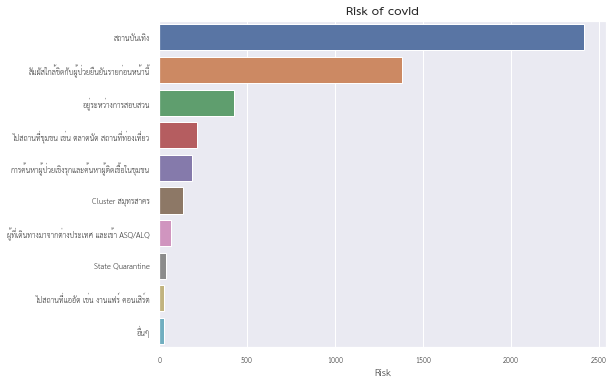

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_risk[:10], y=df_risk.index[:10], x='risk')
plt.title("Risk of covid",fontdict= {'fontsize': 18, 'fontweight':'bold'}) 
plt.xlabel("Risk",fontsize = 15)
plt.show()

จากกราฟจะพบว่า ผู้ป่วยโควิดส่วนใหญ่มีปัจจัยเสี่ยงมาจากสถานบันเทิงมากเป็นอันดับ 1 รองลงมาจะเป็นกลุ่มผู้ป่วยที่มีการสัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้า

In [36]:
df_province = df['province'].value_counts().to_frame()
df_province

,province
กรุงเทพมหานคร,1533
เชียงใหม่,720
ชลบุรี,511
สมุทรปราการ,374
นราธิวาส,299
...,...
ชัยนาท,2
มุกดาหาร,2
บึงกาฬ,2
กาฬสินธุ์,1


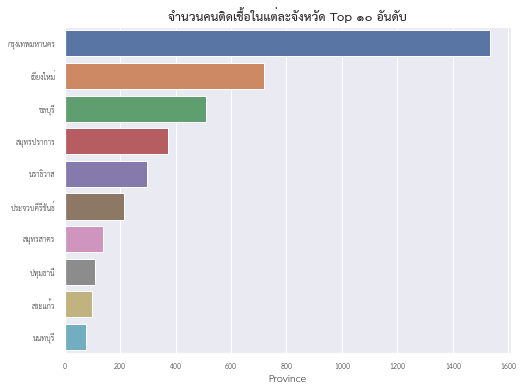

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_province[:10], y=df_province.index[:10], x='province')
plt.title("จำนวนคนติดเชื้อในแต่ละจังหวัด Top 10 อันดับ",fontdict= {'fontsize': 18, 'fontweight':'bold'}) 
plt.xlabel("Province",fontsize = 15)
plt.show()

จากกราฟจะพบว่า ผู้ป่วยโควิดส่วนใหญ่จะเป็นกลุ่มคนที่อยู่ในจังหวัดกรุงเทพมหานคร

#### Summary

Question: กลุ่มผู้ป่วยโควิดระลอก 3 ตั้งแต่วันที่ 01/04/2021 ส่วนใหญ่เป็นกลุ่มคนไหน อยู่ในช่วงอายุเท่าไหร่ และมีปัจจัยเสี่ยงมาจากที่ใด
Answer: จากการทำ Visualization พบว่าผู้ป่วยส่วนใหญ่จะเป็นเพศชาย และอยู่ในช่วงอายุ 20-29 ปี แต่ถ้าดูเฉพาะในช่วงอายุ 20-29 ปี ผู้หญิงจะเป็นมากกว่าผู้ชาย
โดยผู้ป่วยโควิดส่วนใหญ่มีปัจจัยเสี่ยงมาจากสถานบันเทิงมากเป็นอันดับ 1 รองลงมาจะเป็นกลุ่มผู้ป่วยที่มีการสัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้า และมักจะเป็นกลุ่มคนที่อยู่ในจังหวัดกรุงเทพมหานคร รองลงมาก็จะเป็นจังหวัดเชียงใหม่